In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meta-data/metadata/UrbanSound8K.csv
/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/

## Audio Classification Using Machine Learning PR Project##

In [2]:
!pip install librosa

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename = '/kaggle/input/dog-audio/dog_bark.wav'

In [5]:
!pip install Ipython
import IPython.display as ipd

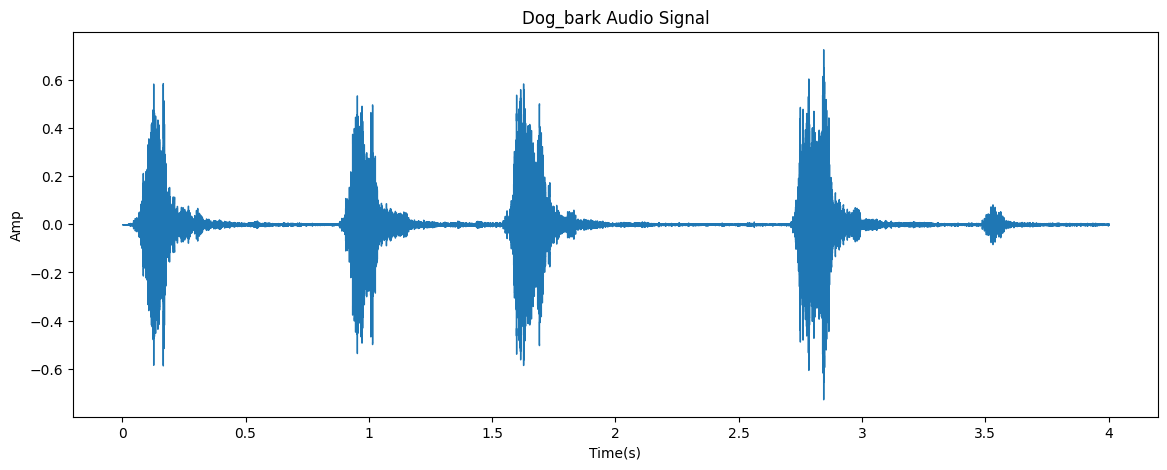

In [6]:
import librosa
import librosa.display
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename) #load audio
librosa.display.waveshow(data,sr=sample_rate)
plt.title("Dog_bark Audio Signal")
plt.xlabel("Time(s)")
plt.ylabel("Amp")
plt.show()
ipd.Audio(filename) #play audio

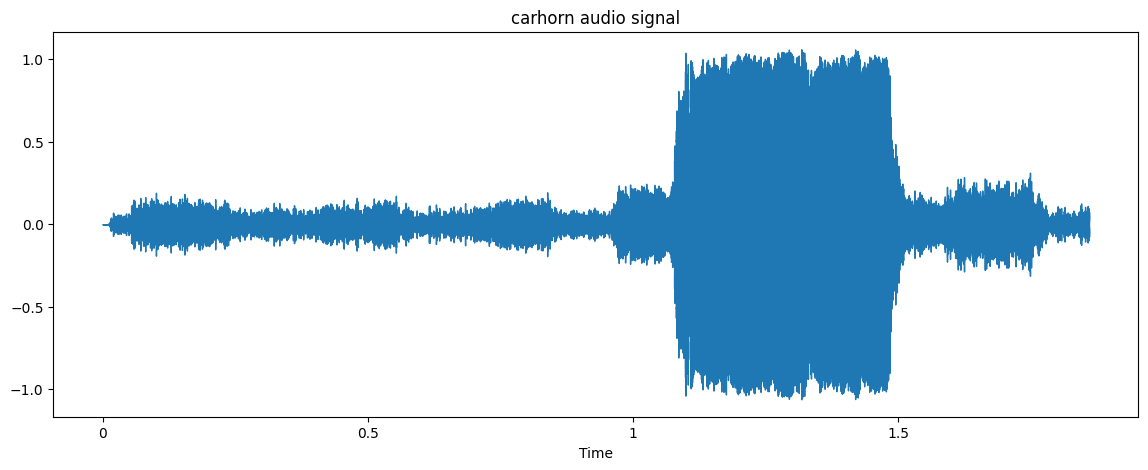

In [7]:
audio = '/kaggle/input/car-horn/car_horn.wav'
plt.figure(figsize=(14,5))
data_1,sample_rate1 = librosa.load(audio)
librosa.display.waveshow(data_1,sr=sample_rate1)
plt.title('carhorn audio signal')
plt.show()
ipd.Audio(audio)

In [8]:
sample_rate #how many tim es per second a sound is sampled

22050

In [9]:
data

array([ 8.7311491e-11, -1.7462298e-10, -8.7311491e-11, ...,
        3.6435056e-04,  2.6052771e-04, -2.1291798e-04], dtype=float32)

In [10]:
import pandas as pd
metadata = pd.read_csv('/kaggle/input/meta-data/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [11]:
#to check wheather the dataset is balanced or imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

looks like its balanced**

#Lets read with scipy****

In [12]:
from scipy.io import wavfile as wav
wave_sr,wave_audio = wav.read(filename)
wave_audio

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [  6,  -5],
       [  7, -17],
       [ -5, -21]], dtype=int16)

***we see two features so they are in two channels and not normalized.****

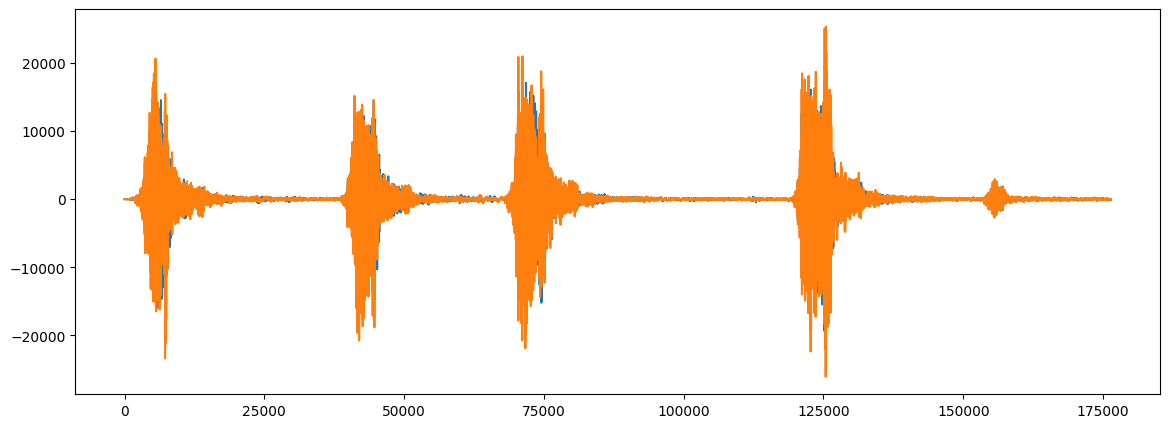

In [13]:
#original audio signal with 2 channel
plt.figure(figsize=(14,5))
plt.plot(wave_audio)

****Mel-Frequency Cepstral Coefficients(MFCC)****

In [14]:
mfccs = librosa.feature.mfcc(y = data,sr = sample_rate)
print(mfccs.shape)

(20, 173)


In [15]:
mfccs


array([[-5.8003693e+02, -4.9177695e+02, -3.6617480e+02, ...,
        -5.0730090e+02, -5.1229175e+02, -5.2267572e+02],
       [ 3.0879444e+01,  1.1654912e+02,  1.7551926e+02, ...,
         9.0842987e+01,  9.2580040e+01,  8.8494919e+01],
       [ 1.7225258e+01,  3.9759499e+01, -5.0101805e+00, ...,
         2.7333740e+01,  2.7949635e+01,  3.1582394e+01],
       ...,
       [ 3.0125871e+00, -1.5511703e+00,  5.3258860e-01, ...,
         5.1835089e+00,  5.0829115e+00,  1.5582659e+00],
       [ 2.7615681e+00, -5.6862268e+00,  4.4167190e+00, ...,
         6.8922186e+00,  2.1993463e+00, -2.9169631e+00],
       [ 2.3576097e+00, -7.3973589e+00, -1.5657707e+01, ...,
         7.0566430e+00,  1.3300307e+00, -3.7916951e+00]], dtype=float32)

****Feature Extraction****

In [16]:
import pandas as pd
import os
import librosa

audio_dataset_path = '/kaggle/input/audio-urban-sound-detection'
metadata = pd.read_csv("/kaggle/input/meta-data/metadata/UrbanSound8K.csv")
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:


import os
import numpy as np
import pandas as pd
import librosa
import pywt
from tqdm import tqdm
from scipy.stats import entropy

metadata_csv = "codes\UrbanSound8K_augmented.csv"
audio_dir = "codes\UrbanSound8K\audio"

metadata = pd.read_csv(metadata_csv)
print("Total files in metadata:", len(metadata))


def extract_features_from_audio(y, sr):
    """
    Extracts MFCC, Chroma, Spectral, Temporal, Entropy, Wavelet Energy
    with Nyquist-safe spectral contrast and resampling.
    """
    try:
        
        if len(y) < 0.25 * sr:
            return None

        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_delta = librosa.feature.delta(mfcc)
        mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
        mfcc_features = np.hstack([
            np.mean(mfcc, axis=1),
            np.mean(mfcc_delta, axis=1),
            np.mean(mfcc_delta2, axis=1)
        ])  

        
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)  # 12

        
        centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        # Safe spectral contrast
        contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, fmin=200.0))
        rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        flatness = np.mean(librosa.feature.spectral_flatness(y=y))
        spectral_features = [centroid, bandwidth, contrast, rolloff, flatness]

        # --- Temporal Features ---
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        rms = np.mean(librosa.feature.rms(y=y))
        temporal_features = [zcr, rms]

        # --- Spectral Entropy (Novel) ---
        S = np.abs(librosa.stft(y))
        ps = S / np.sum(S)
        spec_entropy = entropy(np.mean(ps, axis=1))
        spectral_entropy = [spec_entropy]

        # --- Wavelet Energy (Novel) ---
        coeffs = pywt.wavedec(y, 'db4', level=5)
        wavelet_energy = [np.sum(np.square(c)) for c in coeffs]

        features = np.hstack([
            mfcc_features,
            chroma,
            spectral_features,
            temporal_features,
            spectral_entropy,
            wavelet_energy
        ])
        return features

    except Exception as e:
        print(f"[Warning] Feature extraction failed: {e}")
        return None

# -----------------------------------------------------------
def extract_features_from_dataset(metadata, audio_dir):
    features_list, labels_list = [], []

    print("\n🎧 Starting dataset-wide extraction...")
    for i, row in tqdm(metadata.iterrows(), total=len(metadata)):
        fold = row['fold']
        file_name = row['slice_file_name']
        label = row['classID']
        file_path = os.path.join(audio_dir, f"fold{fold}", file_name)

        if not os.path.exists(file_path):
            print(f"[Skip] Missing file: {file_path}")
            continue

        try:
            # Force resampling to 22.05 kHz to avoid Nyquist issues
            y, sr = librosa.load(file_path, sr=22050, mono=True)
            feats = extract_features_from_audio(y, sr)
            if feats is not None:
                features_list.append(feats)
                labels_list.append(label)
        except Exception as e:
            print(f"[Error] {file_name}: {e}")
            continue

        if i % 500 == 0 and i > 0:
            print(f"Processed {i} files...")

    if len(features_list) == 0:
        print("❌ No valid features extracted.")
        return np.empty((0,)), np.empty((0,))

    X = np.vstack(features_list)
    y = np.array(labels_list)
    print(f"\n✅ Extraction Complete: {X.shape[0]} samples, {X.shape[1]} features each.")
    return X, y

# -----------------------------------------------------------
X, y = extract_features_from_dataset(metadata, audio_dir)

if X.size > 0:
    np.save("X_features.npy", X)
    np.save("y_labels.npy", y)
    print("\n💾 Saved:")
    print("   X_features.npy ->", X.shape)
    print("   y_labels.npy   ->", y.shape)


🎵 Total files in metadata: 8732

🎧 Starting dataset-wide extraction...


  1%|          | 66/8732 [00:06<15:02,  9.61it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
  6%|▌         | 501/8732 [00:55<10:11, 13.47it/s]

Processed 500 files...


 11%|█▏        | 1002/8732 [01:49<12:14, 10.52it/s]

Processed 1000 files...


 17%|█▋        | 1502/8732 [02:38<11:48, 10.21it/s]

Processed 1500 files...


 23%|██▎       | 2002/8732 [03:29<13:21,  8.40it/s]

Processed 2000 files...


 29%|██▊       | 2503/8732 [04:19<09:32, 10.87it/s]

Processed 2500 files...


 34%|███▍      | 3005/8732 [05:13<04:07, 23.13it/s]

Processed 3000 files...


 40%|████      | 3502/8732 [06:02<09:47,  8.91it/s]

Processed 3500 files...


 46%|████▌     | 4002/8732 [06:57<11:37,  6.78it/s]

Processed 4000 files...


 52%|█████▏    | 4502/8732 [07:54<07:47,  9.05it/s]

Processed 4500 files...


 57%|█████▋    | 5002/8732 [08:50<07:18,  8.50it/s]

Processed 5000 files...


 63%|██████▎   | 5502/8732 [09:43<06:14,  8.63it/s]

Processed 5500 files...


 69%|██████▊   | 6002/8732 [10:32<04:28, 10.15it/s]

Processed 6000 files...


 74%|███████▍  | 6502/8732 [11:18<04:03,  9.17it/s]

Processed 6500 files...


 80%|████████  | 7002/8732 [12:11<02:59,  9.62it/s]

Processed 7000 files...


 86%|████████▌ | 7501/8732 [13:01<02:07,  9.68it/s]

Processed 7500 files...


 92%|█████████▏| 8002/8732 [13:53<01:13,  9.91it/s]

Processed 8000 files...


 97%|█████████▋| 8502/8732 [14:42<00:25,  8.92it/s]

Processed 8500 files...


100%|██████████| 8732/8732 [15:05<00:00,  9.64it/s]


✅ Extraction Complete: 8688 samples, 65 features each.

💾 Saved:
   X_features.npy -> (8688, 65)
   y_labels.npy   -> (8688,)


In [18]:

# Load your arrays
X = np.load("X_features.npy")
y = np.load("y_labels.npy")

# Convert to DataFrame
feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

# Add label column
df["label"] = y

# Save to CSV
df.to_csv("UrbanSound8K_Features.csv", index=False)

print("✅ DataFrame created and saved as 'UrbanSound8K_Features.csv'")
print("Shape:", df.shape)
print(df.head())


✅ DataFrame created and saved as 'UrbanSound8K_Features.csv'
Shape: (8688, 66)
    feature_1   feature_2   feature_3  feature_4  feature_5  feature_6  \
0 -211.936981   62.581215 -122.813148 -60.745289 -13.893758 -29.789837   
1 -417.005157   99.336624  -42.995583  51.073326   9.853777   7.969693   
2 -452.393158  112.362534  -37.578068  43.195866   8.631845  15.379368   
3 -406.479218   91.196602  -25.043556  42.784519  11.586844   5.054164   
4 -439.638672  103.862244  -42.658783  50.690285  12.209422  15.873465   

   feature_7  feature_8  feature_9  feature_10  ...  feature_57  feature_58  \
0  -3.978871  11.682741  12.963834    8.336420  ...    0.123465    0.126444   
1  11.197088   1.929118   7.030397    4.270228  ...    0.138779    0.003993   
2  16.882149   1.233047   6.833122    3.900116  ...    0.102003    0.003006   
3  12.431632  -1.599949   6.656065    1.442354  ...    0.130761    0.004653   
4  11.729268   1.533584  11.292242    2.548622  ...    0.118105    0.003216   

 

In [19]:
df_FE = pd.read_csv("UrbanSound8K_Features.csv")
df_FE.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,label
0,-211.936981,62.581215,-122.813148,-60.745289,-13.893758,-29.789837,-3.978871,11.682741,12.963834,8.336420,...,0.123465,0.126444,5.740924,0.200505,10.166754,77.910027,88.097969,12.225162,0.630458,3
1,-417.005157,99.336624,-42.995583,51.073326,9.853777,7.969693,11.197088,1.929118,7.030397,4.270228,...,0.138779,0.003993,6.173551,0.667559,0.069549,0.106286,0.410832,0.246407,0.019076,2
2,-452.393158,112.362534,-37.578068,43.195866,8.631845,15.379368,16.882149,1.233047,6.833122,3.900116,...,0.102003,0.003006,6.014621,0.512117,0.039213,0.120392,0.110934,0.045475,0.004571,2
3,-406.479218,91.196602,-25.043556,42.784519,11.586844,5.054164,12.431632,-1.599949,6.656065,1.442354,...,0.130761,0.004653,6.272897,0.787343,0.422906,0.245016,0.419251,0.281128,0.044775,2
4,-439.638672,103.862244,-42.658783,50.690285,12.209422,15.873465,11.729268,1.533584,11.292242,2.548622,...,0.118105,0.003216,6.071737,0.579337,0.037216,0.058976,0.176585,0.084204,0.007839,2
5,-441.085907,108.920609,-25.777704,47.518364,10.559943,17.494892,13.253759,4.494607,5.498724,3.752238,...,0.073318,0.004142,5.906197,1.435799,0.050098,0.055382,0.086274,0.042766,0.005826,2
6,-469.419647,109.280113,-18.456551,46.043015,11.825916,17.288229,10.015718,3.038617,6.914885,2.993726,...,0.073457,0.002865,5.890362,0.599665,0.038489,0.027792,0.048855,0.020210,0.003134,2
7,-457.146454,106.527657,-19.124525,39.871788,4.823956,22.051247,16.051298,7.627046,6.465356,5.748669,...,0.072240,0.003185,5.910159,0.766501,0.030969,0.049667,0.045890,0.024987,0.003949,2
8,-466.264099,118.132248,-29.881447,50.494637,5.178185,21.636284,13.622514,7.285784,8.189789,3.133919,...,0.066776,0.003452,5.811889,0.917177,0.035147,0.044839,0.050385,0.036001,0.004839,2
9,-188.625641,102.429115,-2.330600,-10.946157,-8.982675,-15.690951,-30.035511,-6.154767,-9.007838,-12.613342,...,0.119106,0.041719,6.052239,6.074108,9.757954,4.973395,4.251507,1.107916,0.526803,1


In [20]:
df_FE.describe()
print(df_FE["label"].value_counts())

label
2    1000
0    1000
9    1000
5    1000
7    1000
4    1000
3     990
8     929
1     398
6     371
Name: count, dtype: int64
